In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from predict import mydynamo

In [3]:
X = pd.read_csv('data/export-hs4-pivot.csv')
#X_new => 2019
X_new = X.loc[X['year_at'] == 2019]
X_new = X_new.drop(['year_at'], axis=1)
X_new = X_new.set_index(['exporter'])

#X_old => 2018
X_old = X.loc[X['year_at'] == 2018]
X_old = X_old.drop(['year_at'], axis=1)
X_old = X_old.set_index(['exporter'])

obs = pd.read_csv('countries.csv')
obs = obs.set_index('name')
# obs

var = pd.DataFrame(np.array(X.columns)[2:], columns=['hscode'])
var = var.set_index('hscode')
# var

In [14]:
mydynamo.config()

package,cvxopt,anndata,loompy,trimap,numdifftools,hdbscan,statsmodels,numba,seaborn,colorcet,tqdm,python-igraph,pynndescent,dynamo-release,matplotlib,numpy,pandas,scikit-learn,scipy,setuptools,umap-learn
version,1.2.5.post1,0.7.5,3.0.6,1.4.3.dev1,0.9.39,0.8.26,0.12.1,0.52.0,0.11.1,2.0.2,4.56.0,0.8.3,0.5.1,0.95.2,3.3.3,1.19.3,1.2.0,0.24.0,1.6.0,49.2.1,0.4.6


In [15]:
adata = mydynamo.createAnnotationData(X_new, X_old, obs, var)
adata

AnnData object with n_obs × n_vars = 219 × 1258
    obs: 'id', 'created_at', 'updated_at', 'code', 'iso_code', 'iso_name', 'parentCode', 'parentName'
    layers: 'spliced', 'unspliced'

In [16]:
mydynamo.dynamoProcess(adata)

calculating transition matrix via pearson kernel with sqrt transform.: 100%|█| 
projecting velocity vector to low dimensional embedding...: 100%|█| 219/219 [00


AnnData object with n_obs × n_vars = 219 × 1258
    obs: 'id', 'created_at', 'updated_at', 'code', 'iso_code', 'iso_name', 'parentCode', 'parentName', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap'
    obsm: 'X_pca', 'X', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con', 'connectivities', 'distances', 'pearson_trans

<Figure size 600x400 with 0 Axes>

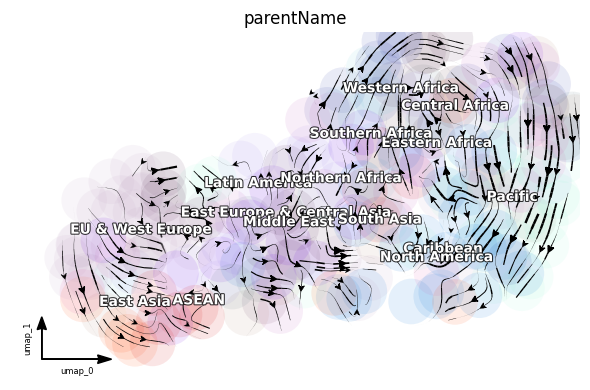

In [17]:
mydynamo.dynamoPlot(adata)